In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Loading the data 

# In order to load the data, We have used the 'pickle library'.i saved the data after text preprocessing and loade date using pickle 

import pandas as pd

data = pd. read_pickle('/content/drive/My Drive/Classroom/cleantext.pkl')

data.shape

(310648, 7)

In [ ]:
data=data[:50000]

In [ ]:
data.head(5)

,UserId,Score,Time,Text,cleantext,Text_stop,Text_lemmatized
138706,ACITT7DI6IDDL,1,939340800,this witty little book makes my son laugh at l...,"[this, witty, little, book, makes, my, son, la...","[witty, little, book, makes, son, laugh, loud,...","[witty, little, book, make, son, laugh, loud, ..."
138683,AJ46FKXOVC7NR,1,940809600,I can remember seeing the show when it aired o...,"[i, can, remember, seeing, the, show, when, it...","[remember, seeing, show, aired, television, ye...","[remember, seeing, show, aired, television, ye..."
417839,AIUWLEQ1ADEG5,1,944092800,Beetlejuice is a well written movie ..... ever...,"[beetlejuice, is, a, well, written, movie, eve...","[beetlejuice, well, written, movie, everything...","[beetlejuice, well, written, movie, everything..."
417838,AJH6LUC1UT1ON,1,946857600,Beetlejuice is an excellent and funny movie. K...,"[beetlejuice, is, an, excellent, and, funny, m...","[beetlejuice, excellent, funny, movie, keaton,...","[beetlejuice, excellent, funny, movie, keaton,..."
70688,A32DW342WBJ6BX,1,948672000,I bought a few of these after my apartment was...,"[i, bought, a, few, of, these, after, my, apar...","[bought, apartment, infested, fruit, flies, ho...","[bought, apartment, infested, fruit, fly, hour..."


-  **Import necessary libraries**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


# loading libraries for split the data and K-NN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.stochastic_gradient import SGDClassifier

In [ ]:
# the data we want to predict

X= data['Text_lemmatized']
Y= data['Score']

In [ ]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,Y,shuffle=False,test_size=0.30)

print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(35000,) (35000,) (15000,) (15000,)


# **Applying LR on BOW**

In [ ]:
def clean_text(text):
  return text
# Representing train text as numerical data by using BOW
bow = CountVectorizer(ngram_range=(1,2), analyzer= clean_text)
X_train_bow= bow.fit_transform(X_train)
print(type(X_train_bow))
print("the number of unique words ", X_train_bow.get_shape()[1])
print("the shape of out text BOW vectorizer ",X_train_bow.get_shape())

<class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  31534
the shape of out text BOW vectorizer  (35000, 31534)


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_final_bow = StandardScaler(with_mean=False).fit_transform(X_train_bow)

In [ ]:
# Test Vectorizor
X_test_bow= bow.transform(X_test)
print(type(X_test_bow))
print(X_test_bow.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(15000, 31534)


In [ ]:
X_test_final_bow = StandardScaler(with_mean=False).fit_transform(X_test_bow)

In [ ]:
X_test_final_bow

<15000x31534 sparse matrix of type '<class 'numpy.float64'>'
	with 466524 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear')

param_grid ={'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],'penalty':['l1']} 

grid = GridSearchCV(clf,param_grid, cv= 10,scoring = 'accuracy',n_jobs=1,return_train_score=True)
grid.fit(X_train_final_bow,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000, 100000],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

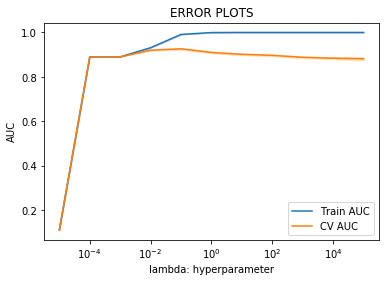

In [ ]:
lambda_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5 
# To find out best lambda from graphical representations
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

plt.plot(lambda_range, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(lambda_range, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xscale('log') # we take the log in the x axis
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
train_auc

array([0.11008571, 0.88991429, 0.89003492, 0.93121905, 0.99099048,
       0.99951746, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [ ]:
optimal_c= lambda_range[cv_auc.argmax()]

optimal_c

0.1

**Train the model**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

LB= LogisticRegression(C= optimal_c, penalty='l1',probability=True) 
LB.fit(X_train_final_bow,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, LB.predict_proba(X_train_final_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,LB.predict_proba(X_test_final_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc='best')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC - LB_L1-BOW')
plt.grid()
plt.show()

TypeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
#plot confusion matrix to describe the performance of classifier
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_train, LB.predict(X_train_final_bow)), range(2),range(2))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Applying LB on TFIDF

In [ ]:
# finding tfidf
tf_idf = TfidfVectorizer(ngram_range=(1,2), min_df=10,analyzer= clean_text)
X_train_tfidf= tf_idf.fit_transform(X_train)
print(X_train_tfidf.get_shape())
type(X_train_tfidf)

In [ ]:
X_train_final_tfidf = StandardScaler(with_mean=False).fit_transform(X_train_tfidf)

In [ ]:
# Test Vectorizor
X_test_tfidf= tf_idf.transform(X_test)
print(type(X_test_tfidf))
print(X_test_tfidf.shape)

In [ ]:
X_test_final_tfidf = StandardScaler(with_mean=False).fit_transform(X_test_tfidf)

In [ ]:
clf = LogisticRegression(solver='liblinear')

param_grid ={'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],'penalty':['l1']} 

grid = GridSearchCV(clf,param_grid, cv= 10,scoring = 'accuracy',n_jobs=1,return_train_score=True)
grid.fit(X_train_final_tfidf,y_train)

In [ ]:
lambda_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000] #alpha from 10^-5 to 10^5
# To find out best lambda from graphical representations
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

plt.plot(lambda_range, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(lambda_range, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xscale('log') # we take the log in the x axis
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
optimal_c= lambda_range[cv_auc.argmax()]

optimal_c

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

LB= LogisticRegression(C=0.01, penalty='l1')
LB.fit(X_train_final_tfidf,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, LB.predict_proba(X_train_final_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,LB.predict_proba(X_test_final_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc='best')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC - LB_L1-t=Tfidf')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
#plot confusion matrix to describe the performance of classifier
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_train, LB.predict(X_train_final_tfidf)), range(2),range(2))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Pertubation Test**

In [ ]:
#value of c is selected as per optimal C in gridsearch
# weight vector using train without noise

LR= LogisticRegression(penalty='l1',C=0.01)
LR.fit(X_train_final_tfidf,y_train)
w_i=LR.coef_
w_i

In [ ]:
# Adding small noise in train data

noise = np.random.normal(loc=0.0, scale=0.0001, size=X_train_final_tfidf.shape)

X_train_final_tfidf_noise = X_train_final_tfidf+noise


In [ ]:
# weight vector using train with noise 
LR= LogisticRegression(penalty='l1',C= optimal_c)
LR.fit(X_train_final_tfidf_noise,y_train)
w_j =LR.coef_


In [ ]:
# Now find the % change between W and W' (| (W-W') / (W) |)*100) 

#to eliminate divisible by zero error we will add 10^-6 to W_before and W_after
w_i+=10**-6
w_j+=10**-6


per_W =[]

for i in range(len(w_i[0])):
    val= w_j[0][i]-w_i[0][i]
    val/=w_i[0][i]
    per_W.append(val)

In [ ]:
df = pd.DataFrame(per_W,columns= ['weight_vector']).abs().sort_values('weight_vector',ascending=[False])
df = df.reset_index(drop=True)

# plot with various axes scales
plt.figure()

plt.subplot()
plt.plot(df.weight_vector)
plt.xscale('log')
plt.title('log')
plt.grid(True)


In [ ]:
df.head(5)

**Show topics and their weights** **Feature importance**

In [ ]:
vocab= tf_idf.get_feature_names()
matrix = LR.coef_
for topic_weights in matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
topic_weights= pd.DataFrame(topic,columns= ['imp_feature','weights'])

In [ ]:
print('Top 10 Positive features :')
Pos=topic_weights.iloc[:10]
Pos

In [ ]:
print('Top 10 negative features :') 

Nev= topic_weights.loc[::-1].reset_index(drop=True).iloc[:10] 
Nev 

# Feature Engineering 

**Average Length of sentence +Ve vs -Ve Review **

In [ ]:
Posreview = data[data.Score== 1].reset_index()
Nevreview = data[data.Score== 0]

In [ ]:
data['lenght'] = data.Text.apply(lambda X: len(X))

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(x= data.Score ,y= data.lenght,data=data)

length doesn't explain weather review is not positive or negative data. 

**Sparsity**

In [ ]:
# More Sparsity (Fewer elements of W* being non-zero) by increasing Lambda (decreasing C)  

lambda_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]

for i in lambda_range:
  clf_c1 = LogisticRegression(C= i, penalty='l1')
  clf_c1.fit(X_train_final_tfidf, y_train)
  w = clf_c1.coef_
  print(np.count_nonzero(w))

# Working with word2vec

In [ ]:
# Train your own Word2Vec model using your own text corpus

T_list=X_train.values.tolist()
t_list=X_test.values.tolist()

In [ ]:
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(T_list,min_count=5,size=50, workers=4)
w2v_model

In [ ]:
print(w2v_model.wv.most_similar('like'))

In [ ]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

In [ ]:
# average Word2Vec for train
# compute average word2vec for each review.
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in T_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
print(len(train_vectors))

X_train_w2v= train_vectors

In [ ]:
X_train_final_w2v = StandardScaler(with_mean=False).fit_transform(X_train_w2v)

In [ ]:
# average Word2Vec for test
# compute average word2vec for each review.
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in t_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)
print(len(test_vectors))

X_test_w2v= test_vectors

In [ ]:
X_test_final_w2v = StandardScaler(with_mean=False).fit_transform(X_test_w2v)

In [ ]:
clf = LogisticRegression(solver='liblinear')

param_grid ={'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],'penalty':['l1']} 

grid = GridSearchCV(clf,param_grid, cv= 10,scoring = 'accuracy',n_jobs=1,return_train_score=True)
grid.fit(X_train_final_w2v,y_train)

In [ ]:
lambda_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000] #lambda from 10^-5 to 10^5 
# To find out best lambda from graphical representations
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

plt.plot(lambda_range, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(lambda_range, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xscale('log') # we take the log in the x axis
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
optimal_c= lambda_range[cv_auc.argmax()]

optimal_c

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

LB= LogisticRegression(C=0.01, penalty='l1')
LB.fit(X_train_final_w2v,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, LB.predict_proba(X_train_final_w2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,LB.predict_proba(X_test_final_w2v)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc='best')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC - LB_L1-t= W2V')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
#plot confusion matrix to describe the performance of classifier
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_train, LB.predict(X_train_final_w2v)), range(2),range(2))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Appling LB with Tf-IdfWord2Vec

In [ ]:
tfidf_feat = tf_idf.get_feature_names() # tfidf words/col-names

tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in T_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = X_train_tfidf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1
tfidfw2v_train = np.nan_to_num(tfidf_sent_vectors_train)

In [ ]:
X_train_final_tfidfw2v = StandardScaler(with_mean=False).fit_transform(tfidfw2v_train)

In [ ]:
# tfidf words/col-names

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in t_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = X_test_tfidf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
tfidfw2v_test = np.nan_to_num(tfidf_sent_vectors_test)

In [ ]:
X_test_final_tfidfw2v = StandardScaler(with_mean=False).fit_transform(tfidfw2v_test)

In [ ]:
clf = LogisticRegression(solver='liblinear')

param_grid ={'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],'penalty':['l1']} 

grid = GridSearchCV(clf,param_grid, cv= 10,scoring = 'accuracy',n_jobs=1,return_train_score=True)
grid.fit(X_train_final_tfidfw2v,y_train)

In [ ]:
lambda_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000] #lambda from 10^-5 to 10^5 
# To find out best lambda from graphical representations
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

plt.plot(lambda_range, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(lambda_range, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xscale('log') # we take the log in the x axis
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
optimal_c= lambda_range[cv_auc.argmax()]

optimal_c

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

LB= LogisticRegression(C=0.01, penalty='l1')
LB.fit(X_train_final_tfidfw2v,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, LB.predict_proba(X_train_final_tfidfw2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,LB.predict_proba(X_test_final_tfidfw2v)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc='best')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC - LB_L1-t= W2V')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
#plot confusion matrix to describe the performance of classifier
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_train, LB.predict(X_train_final_tfidfw2v)), range(2),range(2))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Vectorizer","Hyperameter", "train_AUC", 'test_AUC']
x.add_row(["BOW",0.1,0.99807837,0.90740])
x.add_row(["TFIDF",0.01,0.95169190,0.9284111])
x.add_row(["Word2V",100000,0.8876522,0.8845555])
x.add_row(["TFidf_Word2V",1,0.856940,0.84846986])

print(x)

bow and tfidf is working well whereas avg word2vec and tfidf w2v is like dumb model.